In [8]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Representação de Dados

## Kraemer

In [3]:
columns = ['1','2','3','4','5']

data = [
    [79.0, 57.0, 60.0, 66.9, 92.8, 62.7, 72.8, 91.0, 79.0, 83.0, 83.1],
    [89.2, 68.9, 68.0, 68.7, 96.5, 73.1, 76.8, 96.0, 81.3, 90.4, 90.5],
    [83.5, 65.4, 61.7, 64.8, 93.8, 56.0, 67.4, 84.2, 76.0, 84.5, 84.4],
    [83.5, 58.0, 59.9, 71.2, 87.4, 57.3, 63.4, 79.3, 73.3, 84.2, 84.3],
    [80.3, 56.5, 60.7, 66.7, 92.2, 67.7, 73.1, 91.3, 79.1, 82.8, 82.9],
]

df = pd.DataFrame(np.transpose(data), columns=columns)

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

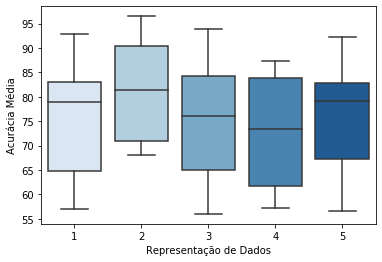

In [4]:
ax = sns.boxplot(data=data, palette='Blues')
ax.set(xlabel='Representação de Dados', ylabel='Acurácia Média')
ax.set_xticklabels(columns, rotation=0)

#fig = ax.get_figure()
#fig.savefig("boxplot_representacao_dados.pdf")

In [5]:
# n0 => hipotese nula (vem de distribuicao normal)
# nA => nao vem de distribuicao normal

alpha = 0.05
for i in df.columns:
    a, b = stats.shapiro(df[[i]])
    print('Stats', a, 'p-value', b)

    if b < alpha:
        print('null hyp can be rejected')
    else:
        print('null hypo cannot be rejected')

Stats 0.943334698677063 p-value 0.5604581236839294
null hypo cannot be rejected
Stats 0.8826534748077393 p-value 0.11242392659187317
null hypo cannot be rejected
Stats 0.9232016801834106 p-value 0.3462148904800415
null hypo cannot be rejected
Stats 0.8830311298370361 p-value 0.11366711556911469
null hypo cannot be rejected
Stats 0.9524951577186584 p-value 0.6759597063064575
null hypo cannot be rejected


In [6]:
#Henze-Zirkler multivariate normality test

import pingouin as pg

pg.multivariate_normality(df, 0.05)

HZResults(hz=0.8360701765023368, pval=0.10093709661489542, normal=True)

In [7]:
# Friedman

stats.friedmanchisquare(data[0],data[1],data[2],data[3],data[4],data[5])

#p-value < 0.05 => CAN BE REJECT NULL HYPOT (The mean for each population is equal), then The mean for each population IS NOT EQUAL

# A representação dos dados tem significancia estatistica na acurácia.

IndexError: list index out of range

In [10]:
# anova test
f_oneway(data[0], data[1], data[2], data[3], data[4])

# NAO REJEITOU HIPOTESE NULA (TODOS TEM MESMA MEDIA)

F_onewayResult(statistic=0.8909795993728175, pvalue=0.47629630565500547)

55

In [17]:
# tukey test

df = pd.DataFrame({'score': data[0] + data[1] + data[2] + data[3] + data[4],
                   'group': np.repeat(['rep1', 'rep2', 'rep3', 'rep4', 'rep5'], repeats=11)})

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  rep1   rep2   6.5545 0.6699  -7.7045 20.8136  False
  rep1   rep3  -0.5091    0.9 -14.7682   13.75  False
  rep1   rep4  -2.3182    0.9 -16.5773 11.9409  False
  rep1   rep5   0.5455    0.9 -13.7136 14.8045  False
  rep2   rep3  -7.0636 0.6137 -21.3227  7.1954  False
  rep2   rep4  -8.8727 0.4089 -23.1318  5.3863  False
  rep2   rep5  -6.0091   0.73 -20.2682    8.25  False
  rep3   rep4  -1.8091    0.9 -16.0682   12.45  False
  rep3   rep5   1.0545    0.9 -13.2045 15.3136  False
  rep4   rep5   2.8636    0.9 -11.3954 17.1227  False
-----------------------------------------------------


# RESULTADOS SAM KNN

In [ ]:
columns = ['1', '2','3']

data = [
    [86.4375,85.125,61.0625,85.375,79.625,63.25,88.5,87.5,56.71875,85.4375,57.16666667,61.5625,86.875,67.29166667,59.25,86.9375,57.58333333,55.53125,88.125,78.375,84.78125,86.8125,86,59.59375,87.875,87.625,59.65625,86.375,84.20833333,66.53125],
    [93.125,100,92.4375,100,95.375,100,91.8125,100,94,100,93.1875,100,92.5625,100,95.5625,100,93.6875,100,95.5625,100],
    [16.0625,13.3125,13.6875,16.375,13.4375,0,15.5,13.5,0,15.6875,13.3125,14,15.5625,13.5625,14.3125,15.625,13.5,14,15.3125,13.4375,14.25,16.8125,0,0,15.5,13.375,14.375,16,13.75,14.125]
]

df = pd.DataFrame(np.transpose(data), columns=columns)

In [ ]:
ax = sns.boxplot(data=data, palette='Blues')
ax.set(xlabel='Representação de Dados', ylabel='Acurácia Média')
ax.set_xticklabels(columns, rotation=0)

#fig = ax.get_figure()
#fig.savefig("boxplot_representacao_dados.pdf")

# Mini Batch Kmeans

## Silhouette Score

In [1]:
columns = ['1','2','3','4','5']

data = [
    [-0.072,     -0.042,     0.027,     -0.002,     -.023,     -.077,     -.023,     -.082,     .082,     .063],
    [0.063,     0.077,     0.038,     0.055,     0.082,     0.009,     0.123,     0.112,     0.028,     0.042],
    [-0.040,     -0.105,     -0.058,     -0.114,     -0.051,     -0.101,     0.008,     -0.036,     -0.065,     -0.055],
    [0.055,     -0.116,     -0.111,     -0.065,     -0.037,     -0.060,     -0.033,     -0.086,     -0.057,     -0.037],
    [-0.016,     0.097,     0.024,     0.094,     0.083,     0.066,     -0.049,     -0.050,     -0.065,     -0.053],
]

df = pd.DataFrame(np.transpose(data), columns=columns)

NameError: name 'pd' is not defined

In [ ]:
ax = sns.boxplot(data=data, palette='Blues')
ax.set(xlabel='Representação de Dados', ylabel='Acurácia Média')
ax.set_xticklabels(columns, rotation=0)

#fig = ax.get_figure()
#fig.savefig("boxplot_representacao_dados.pdf")

In [ ]:
# n0 => hipotese nula (vem de distribuicao normal)
# nA => nao vem de distribuicao normal

alpha = 0.05
for i in df.columns:
    a, b = stats.shapiro(df[[i]])
    print('Stats', a, 'p-value', b)

    if b < alpha:
        print('null hyp can be rejected')
    else:
        print('null hypo cannot be rejected')

In [ ]:
#Henze-Zirkler multivariate normality test

import pingouin as pg

pg.multivariate_normality(df, 0.05)

In [ ]:
# Friedman

stats.friedmanchisquare(data[0],data[1],data[2],data[3],data[4])

#p-value < 0.05 => CAN BE REJECT NULL HYPOT (The mean for each population is equal), then The mean for each population IS NOT EQUAL

# A representação dos dados tem significancia estatistica na acurácia.

## Homogeneity Score

In [ ]:
columns = ['1','2','3','4','5']

data = [
    [87.51,	81.20,	86.64,	87.91,	85.14,	84.42,	81.59,	81.15,	85.63,	83.40],
    [88.53,	91.05,	89.88,	88.99,	89.11,	88.99,	90.79,	91.20,	90.63,	89.72],
    [83.84,	80.60,	83.60,	77.94,	84.93,	83.58,	84.46,	81.98,	83.42,	80.66],
    [83.73,	84.32,	82.66,	85.04,	87.18,	85.09,	86.40,	85.45,	84.14,	86.80],
    [87.45,	87.74,	85.04,	86.76,	85.74,	82.01,	83.41,	85.84,	85.00,	87.30]
]

df = pd.DataFrame(np.transpose(data), columns=columns)

In [ ]:
ax = sns.boxplot(data=data, palette='Blues')
ax.set(xlabel='Representação de Dados', ylabel='Acurácia Média')
ax.set_xticklabels(columns, rotation=0)

#fig = ax.get_figure()
#fig.savefig("boxplot_representacao_dados.pdf")

In [ ]:
# n0 => hipotese nula (vem de distribuicao normal)
# nA => nao vem de distribuicao normal

alpha = 0.05
for i in df.columns:
    a, b = stats.shapiro(df[[i]])
    print('Stats', a, 'p-value', b)

    if b < alpha:
        print('null hyp can be rejected')
    else:
        print('null hypo cannot be rejected')

In [ ]:
#Henze-Zirkler multivariate normality test

import pingouin as pg

pg.multivariate_normality(df, 0.05)

In [ ]:
# Friedman

stats.friedmanchisquare(data[0],data[1],data[2],data[3],data[4])

#p-value < 0.05 => CAN BE REJECT NULL HYPOT (The mean for each population is equal), then The mean for each population IS NOT EQUAL

# A representação dos dados tem significancia estatistica na acurácia.